In [16]:
from time import time

import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

t = time()

data = pd.read_excel('data/all_features_v2_dataset_no_header.xlsx')

X = data.iloc[:,0:13]  # features
Y = data.iloc[:,-1]    # label column

In [ ]:
print(X.to_numpy())
print(Y.to_numpy())

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.3,random_state=109) # 70% training and 30% test

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train)
y_train = encoder.transform(Y_train)

# encoding test labels 
encoder.fit(Y_test)
y_test = encoder.transform(Y_test)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
t = time()
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

print('Time train: {} mins'.format(round((time() - t) / 60, 2)))

Time train: 2.87 mins


In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='positive', average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='positive', average='micro'))

Accuracy: 0.7381624557767216
Precision: 0.7381624557767216
Recall: 0.7381624557767216


C:\Users\JesterPC\anaconda3\envs\cse4062_conda\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [20]:
Y_pred_label = list(encoder.inverse_transform(y_pred))

# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
confusion_matrix_res = confusion_matrix(Y_test,Y_pred_label)
print(confusion_matrix_res)
print("\n")
print(classification_report(Y_test,Y_pred_label))



[[   53     0     0    14     0     5     6     1    29]
 [    1   602     3    34     1    39    52    29   113]
 [    1    20    25    33     3    25    37    32   100]
 [    0     0     2  5195    90   182  1298     0   162]
 [    2     2     0   163   301    13    52    16   108]
 [    4     1     5   417    25   931   319   119   315]
 [    3     0     0   862    23    94 10716     0   244]
 [    1     5     1    95    10    98   184   647   259]
 [    9    75     2   355    36   232   719   147  2186]]


              precision    recall  f1-score   support

    Currency       0.72      0.49      0.58       108
    DateTime       0.85      0.69      0.76       874
       Event       0.66      0.09      0.16       276
    Location       0.72      0.75      0.74      6929
 Nationality       0.62      0.46      0.53       657
Organization       0.58      0.44      0.50      2136
      Person       0.80      0.90      0.85     11942
  PersonType       0.65      0.50      0.56      13

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
labels = ['Currency', 'DateTime', 'Event', 'Location', 'Nationality', 'Organization', 'Person', 'PersonType', 'Thing']

df_cm = pd.DataFrame(confusion_matrix_res, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

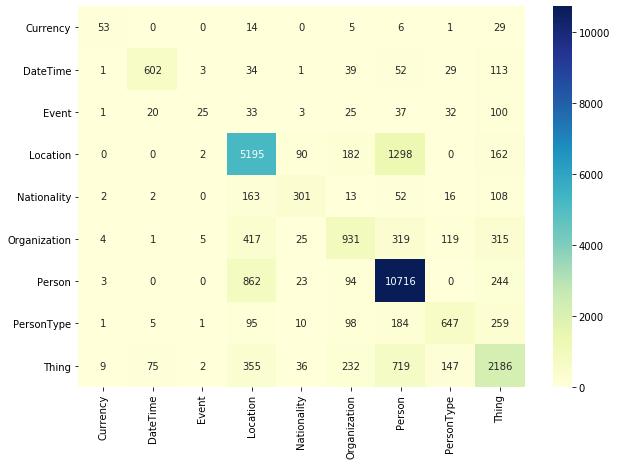

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
labels = ['Currency', 'DateTime', 'Event', 'Location', 'Nationality', 'Organization', 'Person', 'PersonType', 'Thing']

df_cm = pd.DataFrame(confusion_matrix_res, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")